# Рынок заведений общественного питания Москвы

**Описание проекта** 


Необходимо провести исследованиие рынка для открытия небольшого кафе в Москве. Идея запуска оригинальная — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Инвесторов интересует текущее положение дел на рынке — сможет ли заведение снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Для исследования у нас есть открытые данные о заведениях общественного питания в Москве.

## Загрузим данные и подготовим их к анализу

In [2]:
#импорт необходимых библиотек
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 6)})
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import warnings
warnings.simplefilter("ignore")


In [3]:
try:
    data = pd.read_csv('rest_data.csv')
except: 
    data = pd.read_csv('/datasets/rest_data.csv')
data.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


**Описание данных:**

* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.

Пока с данными кажется все отлично, сразу видно что они оформлены аккуратно. Единственное что в названиях объектов встречается капс и приписка в виде слова "Кафе", "Буфет". Посмотрим на общую информацию и поищем дубликаты и пропуски.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

Удаляю в названиях объектов тип объектов, т.к для этого у нас есть отдельная колонка и приведу эту колонку к нижнему регистру.

In [7]:
#data['object_name'] = data['object_name'].str.lower()

In [8]:
#del_symbols = ['Кафе', 'Буфет', 'Столовая',  '«', '»']
#for del_s in del_symbols:
#    data['object_name'] = data['object_name'].str.replace(del_s, ' ')
#data.head(10)    

In [9]:
data.duplicated().sum()

0

In [10]:
data['object_type'] = data['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
data['object_type'] = data['object_type'].replace('магазин (отдел кулинарии)', 'отдел кулинарии')
data['chain'] = data['chain'].map({'нет':'несетевое','да':'сетевое'})


In [11]:
data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная', 'фаст-фуд', 'ресторан',
       'кафетерий', 'буфет', 'бар', 'отдел кулинарии'], dtype=object)

**Вывод:**

Дубликаты и пустые значения не обнаружены. Данные подготовлены для дальнейшего анализа. 

Всего для нашего исследования доступно 15366 уникальных строк.

## Анализ данных

### Исследуем соотношение видов объектов общественного питания по количеству. Построим график.

In [12]:
types = data.pivot_table(index='object_type', values='id', aggfunc='count').sort_values(by='id', ascending=False)
types

,id
object_type,
кафе,6099
столовая,2587
ресторан,2285
фаст-фуд,1923
бар,856
буфет,585
кафетерий,398
закусочная,360
отдел кулинарии,273


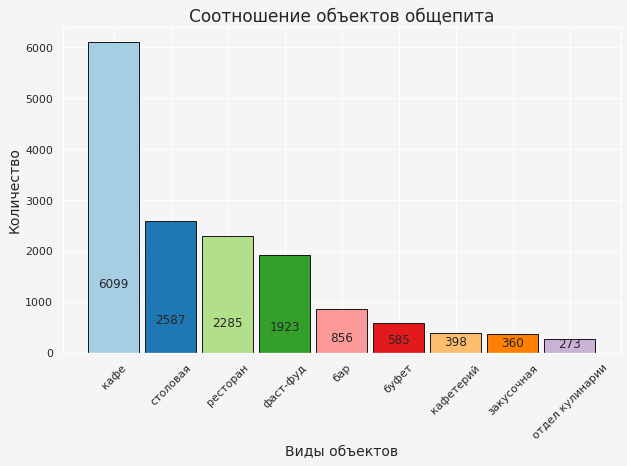

In [13]:
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')

cafes = types.index
numbers = types['id']

fig, ax = plt.subplots()
col_map = plt.get_cmap('Paired')
ax = plt.bar(cafes, numbers, width=0.9, color=col_map.colors, edgecolor='k')
ax = plt.gca()
ax.set_facecolor('whitesmoke')
fig.set_facecolor('whitesmoke')
plt.title('Cоотношение объектов общепита', fontsize=17)
plt.ylabel('Количество', fontsize=14)
plt.xlabel('Виды объектов', fontsize=14)
plt.xticks(rotation=45)
autolabel(ax.patches, height_factor=0.2)

По графику мы видим, что подавляющее число заведений в Москве это кафе(более 6тыс.заведений), далее идут столовые(2587 заведений), ресторан и фаст-фуд (2285 и 1923 заведения соответственно). 

### Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.

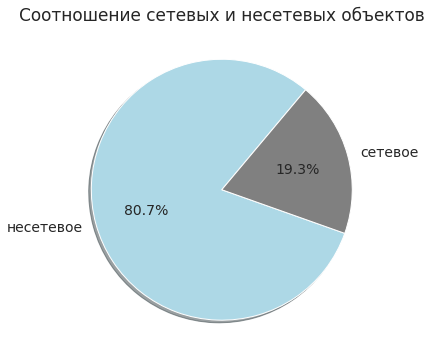

In [14]:
chain = data.groupby('chain')['id'].count().reset_index().sort_values(by='id', ascending=False)
labels = chain['chain']
fig1, ax1 = plt.subplots()
#explode = chain.query('chain == "сетевое"').count()
ax1.pie(chain['id'], labels=labels, colors=['lightblue', 'grey'], autopct='%1.1f%%',
        shadow=True, startangle=50, pctdistance=0.6, textprops = {'fontsize':14})
plt.title("Соотношение сетевых и несетевых объектов", fontsize=17)
plt.show()

In [15]:
chain = pd.DataFrame(data.query('chain == "сетевое"').groupby('object_type')['object_name'].count())
not_chain = pd.DataFrame(data.query('chain == "несетевое"').groupby('object_type')['object_name'].count())
result = pd.merge(chain, not_chain, how='inner', on='object_type')

In [16]:
result.columns=['chain', 'not_chain']

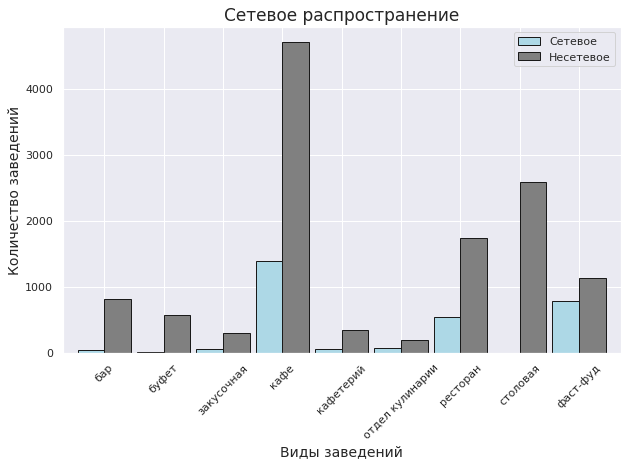

In [17]:
#plt.figure(figsize=(15, 8))
result.plot.bar(rot=45, legend=True, grid=True, width=0.9, color=['lightblue', 'grey'], edgecolor='k')
plt.title('Cетевое распространение', fontsize=17)
plt.ylabel('Количество заведений', fontsize=14)
plt.xlabel('Виды заведений', fontsize=14)
plt.legend(['Сетевое', 'Несетевое'])

plt.show()

Cетевое распространение больше всего характерно для фаст-фудов, посмотрим на соотношения других видов ОП более наглядно.

In [18]:
result['ratio'] = result['chain']/(result['not_chain'] +  result['chain']) * 100
result = result.sort_values(by='ratio')
result

,chain,not_chain,ratio
object_type,,,
столовая,3,2584,0.115964
буфет,11,574,1.880342
бар,37,819,4.322430
кафетерий,52,346,13.065327
закусочная,56,304,15.555556
кафе,1396,4703,22.888998
ресторан,544,1741,23.807440
отдел кулинарии,78,195,28.571429
фаст-фуд,791,1132,41.133645


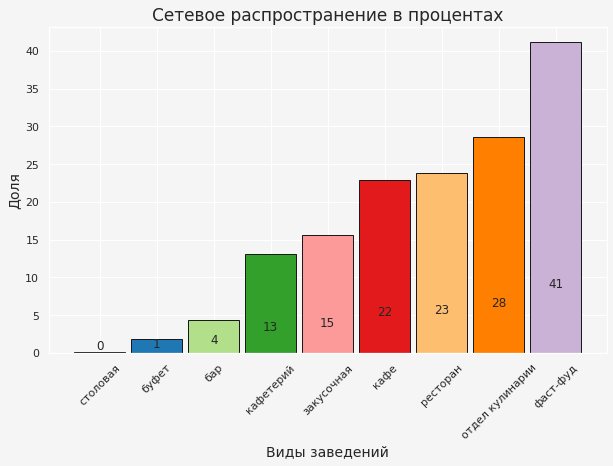

In [19]:
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')

cafes = result.index
ratio = result['ratio']

fig, ax = plt.subplots()
col_map = plt.get_cmap('Paired')
ax = plt.bar(cafes, ratio, width=0.9, color=col_map.colors, edgecolor='k')
ax = plt.gca()
ax.set_facecolor('whitesmoke')
fig.set_facecolor('whitesmoke')
plt.title('Сетевое распространение в процентах', fontsize=17)
plt.ylabel('Доля', fontsize=14)
plt.xlabel('Виды заведений', fontsize=14)
plt.xticks(rotation=45)

autolabel(ax.patches, height_factor=0.2)

Здесь очевидно, что фаст-фуд занимает первое место в распространении, на втором и третьем месте отдел кулинарии и ресторан соответственно. 

### Посмотрим что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест

In [20]:
chain = data.query('chain == "сетевое"').groupby('object_name').agg({'number':'mean', 'object_name':'count'})
chain

,number,object_name
object_name,,
Beverly Hills Diner,88.000000,1
Bierloga,75.000000,1
Black & White,40.000000,1
Bocconcino,66.666667,3
BooBo,46.000000,1
...,...,...
кафе «Папа Джонс»,24.000000,1
кафе «Старбакс»,63.500000,2
кафе «Шоколадница»,50.000000,1


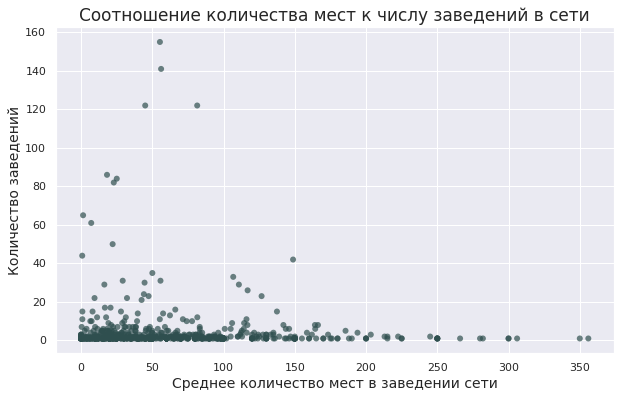

In [21]:
sns.scatterplot(data=chain,
               x='number',
               y='object_name',
               alpha = .7,
               edgecolor = 'none',
               color = 'darkslategrey')
plt.title('Cоотношение количества мест к числу заведений в сети', fontsize=17)
plt.ylabel('Количество заведений', fontsize=14)
plt.xlabel('Среднее количество мест в заведении сети', fontsize=14)
plt.show()

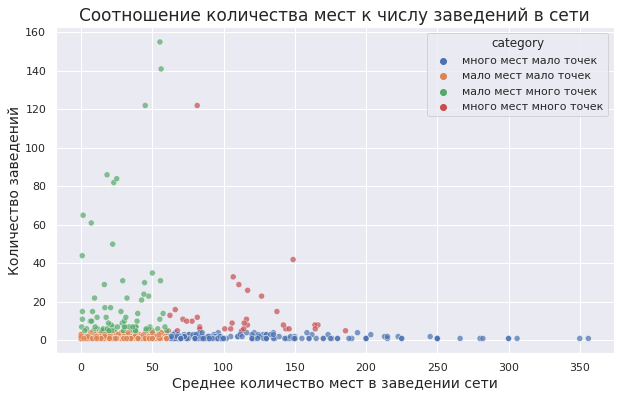

In [22]:
chain = data.query('chain == "сетевое"').groupby('object_name').agg({'number':'mean', 'object_name':'count'})
avg_number = chain.number.mean()
avg_count = chain.object_name.mean()
chain['number_category'] = chain['number'] < avg_number
chain['number_category'] = chain['number_category'].replace({True: 'мало мест',
                                                             False: 'много мест'})
chain['count_category'] = chain['object_name'] < avg_count
chain['count_category'] = chain['count_category'].replace({True: 'мало точек',
                                                           False: 'много точек'})
chain['category'] = chain['number_category'] + ' ' + chain['count_category']
sns.scatterplot(data=chain,
               x='number',
               y='object_name',
               hue='category',
               alpha = .7)
plt.title('Cоотношение количества мест к числу заведений в сети', fontsize=17)
plt.ylabel('Количество заведений', fontsize=14)
plt.xlabel('Среднее количество мест в заведении сети', fontsize=14)
plt.show()

На точечном графике мы видим, что область врайоне плоскости х более "заселена" точками, а значит для большинства заведений характерно небольшое количество заведений и большое количество мест.

### Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построим графики.

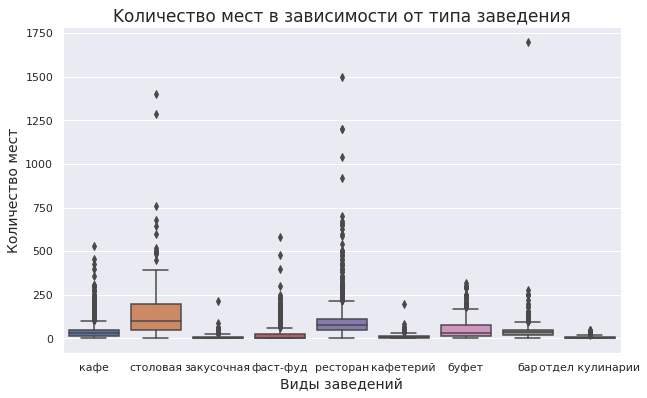

In [23]:
ax = sns.boxplot(x="object_type", y="number", data=data)
plt.title('Kоличество мест в зависимости от типа заведения', fontsize=17)
plt.ylabel('Количество мест', fontsize=14)
plt.xlabel('Виды заведений', fontsize=14)

plt.show()

Увеличим масштаб, исключая выбросы из графика.

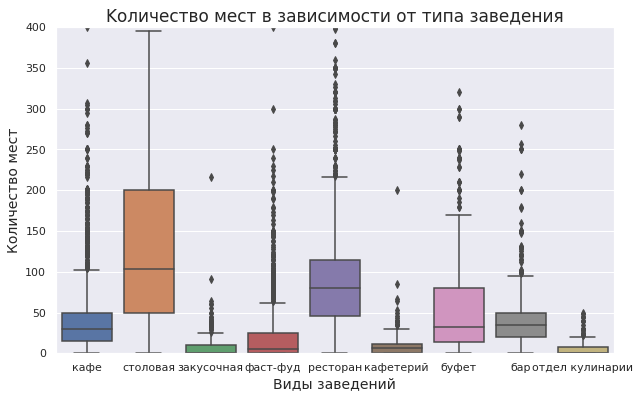

In [24]:
ax = sns.boxplot(x="object_type", y="number", data=data)
plt.title('Kоличество мест в зависимости от типа заведения', fontsize=17)
plt.ylabel('Количество мест', fontsize=14)
plt.xlabel('Виды заведений', fontsize=14)
ax.set_ylim(0, 400)

plt.show()

Большое количество мест более всего характерно для столовых, в среднем около 100 мест. На втором месте расположились рестораны - около 75 мест на заведение. Кафе, бар и буфет имеют в среднем 30 посадочных мест на заведение.

### Выделим в отдельный столбец информацию об улице из столбца address . Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы.


In [25]:
data['street'] = data['address'].str.split(', ', expand=True)[1]
data

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,сетевое,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,сетевое,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение Московский


Посмотрим на топ-10 самых популярных улиц по количеству объектов общественного питания.

In [26]:
data['street'].value_counts().head(10)

город Зеленоград          232
проспект Мира             204
Профсоюзная улица         182
Ленинградский проспект    171
Пресненская набережная    167
Варшавское шоссе          161
Ленинский проспект        147
поселение Сосенское       138
проспект Вернадского      132
Кутузовский проспект      114
Name: street, dtype: int64

В список попали город Зеленоград и поселение Сосенское, исключим их и посмотрим на результат.

In [27]:
data = data.query('"город Зеленоград" not in street and "поселение Сосенское" not in street')
top10_streets = (data.groupby('street')
    .agg({'id':'count'})
    .reset_index()
    .sort_values(by='id', ascending=False)
).head(10)
top10_streets

,street,id
1450,проспект Мира,204
993,Профсоюзная улица,182
683,Ленинградский проспект,171
979,Пресненская набережная,167
407,Варшавское шоссе,161
686,Ленинский проспект,147
1447,проспект Вернадского,132
674,Кутузовский проспект,114
600,Каширское шоссе,112
605,Кировоградская улица,110


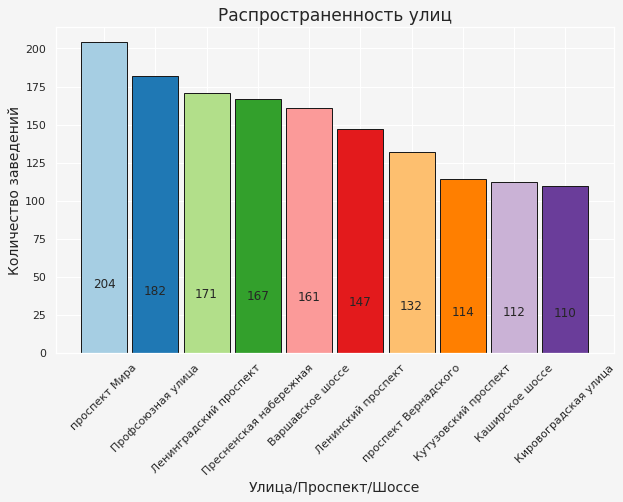

In [28]:
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')

street = top10_streets['street']
quantity = top10_streets['id']

fig, ax = plt.subplots()
col_map = plt.get_cmap('Paired')
ax = plt.bar(street, quantity, width=0.9, color=col_map.colors, edgecolor='k')
ax = plt.gca()
ax.set_facecolor('whitesmoke')
fig.set_facecolor('whitesmoke')
plt.title('Распространенность улиц', fontsize=17)
plt.ylabel('Количество заведений', fontsize=14)
plt.xlabel('Улица/Проспект/Шоссе', fontsize=14)
plt.xticks(rotation=45)

autolabel(ax.patches, height_factor=0.2)

Наиболее популярными улицами является проспект Мира, Профсоюзная улица, Ленинградский проспект.

Обратимся к внешнему источнику для прикрепления районов города.

In [29]:
url = "https://drive.google.com/file/d/1WeSnT72TAmVe7cDMmoqGHWM7CtMLgOEa/view?usp=sharing"
url2 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]


data_internet = pd.read_csv(url2)

data_internet.head()


,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [30]:
top_streets_with_area = top10_streets.merge(data_internet, left_on = 'street', right_on = 'streetname', how='left')
pd.options.display.max_colwidth = 200 
top_streets_with_area.groupby('streetname')['area'].apply(list).reset_index()

,streetname,area
0,Варшавское шоссе,"[Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное, Донской район, Район Нагатино-Садовники, Нагорный район, Район Северное Бутово, Район Южное Бутово]"
1,Каширское шоссе,"[Район Москворечье-Сабурово, Район Нагатино-Садовники, Район Орехово-Борисово Южное, Район Орехово-Борисово Северное]"
2,Кировоградская улица,"[Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное]"
3,Кутузовский проспект,"[Район Дорогомилово, Район Фили-Давыдково]"
4,Ленинградский проспект,"[Район Аэропорт, Район Беговой, Хорошевский район, Район Сокол]"
5,Ленинский проспект,"[Район Проспект Вернадского, Район Тропарево-Никулино, Донской район, Район Гагаринский, Ломоносовский район, Обручевский район, Район Теплый Стан, Район Якиманка]"
6,Пресненская набережная,[Пресненский район]
7,Профсоюзная улица,"[Академический район, Район Черемушки, Район Ясенево, Район Коньково, Обручевский район, Район Теплый Стан]"
8,проспект Вернадского,"[Район Проспект Вернадского, Район Раменки, Район Тропарево-Никулино, Район Гагаринский, Ломоносовский район]"
9,проспект Мира,"[Алексеевский район, Ярославский Район, Район Марьина роща, Останкинский район, Район Ростокино, Район Свиблово, Мещанский район]"


Проспект Мира есть в 7 районах города Москвы, другие популярные улицы тоже встречаются не единожды. Это говорит о том, что эти улицы очень длинные и проходят через несколько районов.

Посмотрим в каких районах заведения общественного питания встречаются чаще.

In [31]:
#top_streets_with_area['area'].value_counts()

Как оказалось в Москве очень много районов и полученная сводка малоинформативна. Длинные проспекты и шоссе находятся сразу в нескольких районах, объединять таблицы надо было бы включая адреса домов, а так получается что одно и то же заведение находится сразу в нескольких районах -_-

### Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответьтим на вопрос — в каких районах Москвы находятся эти улицы.

In [32]:
data_area = data.merge(data_internet, left_on = 'street', right_on = 'streetname', how='left')
streets_with_1_rest = pd.DataFrame(data_area['street'].value_counts())
streets_with_1_rest

,street
проспект Мира,1428
Варшавское шоссе,1288
Ленинский проспект,1176
Профсоюзная улица,1092
Дмитровское шоссе,700
...,...
переулок Хользунова,1
улица Лапина,1
Большая Бутовская улица,1
улица Девятая Рота,1


In [33]:
streets_with_1_rest = data_area.pivot_table(index='street', values='id', aggfunc='count')
streets_with_1_rest = streets_with_1_rest.query('id == 1')
len(streets_with_1_rest)

540

Всего в Москве 540 улиц с одним объектов общественного питания.

In [34]:
streets_with_1_rest_area = pd.DataFrame(streets_with_1_rest.merge(data_internet, left_on='street', right_on='streetname', how='left'))
streets_with_1_rest_area['area'].value_counts().head(10)

Таганский район        25
Басманный район        23
Район Хамовники        22
Тверской район         19
Район Марьина роща     16
Район Сокольники       15
Пресненский район      15
Мещанский район        13
Район Замоскворечье    12
Район Лефортово        11
Name: area, dtype: int64

In [35]:
streets_with_1_rest_area = (streets_with_1_rest_area.groupby('area').agg({'id':'count'})
    .reset_index()
    .sort_values(by='id', ascending=False)
).head(15)
streets_with_1_rest_area

,area,id
88,Таганский район,25
3,Басманный район,23
75,Район Хамовники,22
89,Тверской район,19
46,Район Марьина роща,16
18,Пресненский район,15
69,Район Сокольники,15
13,Мещанский район,13
31,Район Замоскворечье,12
43,Район Лефортово,11


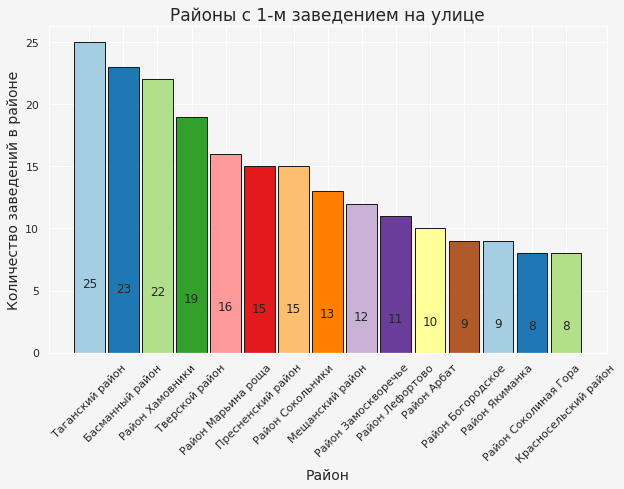

In [36]:
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')

area = streets_with_1_rest_area['area']
quantity = streets_with_1_rest_area['id']

fig, ax = plt.subplots()
col_map = plt.get_cmap('Paired')
ax = plt.bar(area, quantity, width=0.9, color=col_map.colors, edgecolor='k')
ax = plt.gca()
ax.set_facecolor('whitesmoke')
fig.set_facecolor('whitesmoke')
plt.title('Районы с 1-м заведением на улице', fontsize=17)
plt.ylabel('Количество заведений в районе', fontsize=14)
plt.xlabel('Район', fontsize=14)
plt.xticks(rotation=45)

autolabel(ax.patches, height_factor=0.2)

Если объединить улицы с одним заведением по районам, то видим, что раойны Таганский, Басманный и Хамовники популярны. 

### Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. 

In [37]:
list_streets =  top10_streets['street'].tolist()
data_top_streets = data.query('@list_streets in street')

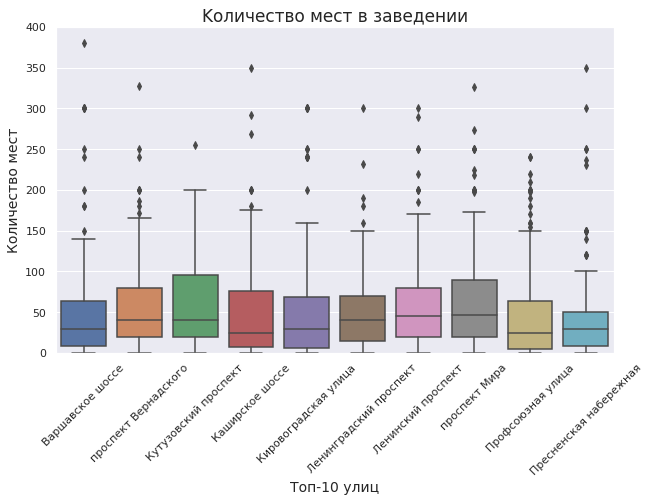

In [38]:
ax = sns.boxplot(x="street", y="number", data=data_top_streets)
plt.title('Kоличество мест в заведении', fontsize=17)
plt.ylabel('Количество мест', fontsize=14)
plt.xlabel('Топ-10 улиц', fontsize=14)
plt.xticks(rotation=45)
ax.set_ylim(0, 400)

plt.show()

Медианное значение посадочных мест на каждой улице ниже 50. Т.к эти улицы проходные и популярные, аренда помещения на них очень высока и размещать большое количество мест нецелесообразно. 

### Вывод:
Мы проанализировали рынок объектов общественного питания в Москве, выделим основные итоги анализа:
   * Среди видов объектов ОП видно явное преобладание кафе. На 2 и 3 месте столовая и ресторан, а на последнем месте с долей меньше 2% находятся магазины (отдел кулинарии).
   * Несетвых объектов ОП примерно в 4 раза больше, чем сетевых.
   * Сетевое распространение наиболее всего характерно для фастфудов (7 из 10 заведений сетевые), отделов кулинарии, а также для ресторанов. И совсем нехарактерно для столовых, буфетов.
   * Для сетевых объектов ОП характерно *много заведений с небольшим числом посадочных мест в каждом*. Сети с большим количеством объектов в средем имеют до 100 посадочных мест.
   * Для сетевых объектов ОП лидерами по количеству посадочных мест является столовая (среднее количество посадочных мест больше 120 мест) и ресторан (около 80-90 мест). Значительно меньше мест в буфетах, барах и кафе (около 40-45).
   * По количеству объектов ОП среди улиц на первом месте находится проспект Мира (204 объекта), второе и третье разделили Профсоюзная улица (182 объекта) и Ленинградский проспект (171 объекта), на 10 месте Кировоградская улица (110 объектов).
   * Районом, который содержит в себе наибольшее количество улиц, на которых расположено по одному объекту является Таганский (25 заведений), на втором и третьем местах расположились район Хамовники (22 заведения) и Басманный район (23 заведения).
   * Для популярных улиц наиболее характерны заведения с небольшим количеством посадочных мест.

### Рекомендации
**Вид заведения**  
Рынок переполнен объектами вида `кафе`, от общего количества объектов питания они составляют практически 40%. `Столовая` или `фаст-фуд` требуют быстрого обслуживания клиентов  и обеспечить это будет проблематично, учитывая что обслуживать персонал будут роботы. Выход из строя работа приведет к тому, что человек не получит того, за чем пришел - быстрое обслуживание, что непременно приведет к снижению рейтинга, а в век смартфонов это очень важно.
Стоит присмотреться к `ресторанам` и `барам`. В `ресторанах` обычно в залах просторно, и робот сможет спокойно передвигаться.   
В `барах` важна точность при наливании напитков, что робот должен легко обеспечить. И приготовление коктейлей не занимает много времени. 
Рассмотривать `буфет`, `кафетерий`, `закусочную` и `магазин (отдел кулинарии)` скорее не стоит, как правило такие виды заведений не приносят большой прибыли, и дорогостоящие роботы могут не окупиться вовсе. 

**Количество посадочных мест**  
Количество посадочных мест должно быть небольшим, до 50. Это поможет сэкономить на количестве роботов и на аренде заведения.  
  
**Район расположения**  
Районы, на улицах которого большое количество объектов не рекомендуется для рассмотрения - большая конкуренция. Но при этом улица должна быть проходной, в благоприятном районе. Рекомендуется рассмотреть районы Таганский, Хамовники, Басманный. 

Презентация : https://disk.yandex.ru/i/jc8GzKzuZpyATA